유동인구에 따른 그 다음날 카드 소비를 예측해보자
1) card 소비 건수와 매출액 vs 각 연령별 유동인구 의 corr 뽑아보자 (전체 sum에선 상관관계가 꽤 높았다, 다시 확인)
2) sum으로 클러스터링해서 동코드를 클러스터링 인덱스로 대체
3) 그리고 FFN로 예측ㄱㄱ

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
move = pd.read_pickle('C:/Users/SunA/Desktop/2019BigCon/최종/sex_age_move.pkl')
fmove = pd.read_pickle('C:/Users/SunA/Desktop/2019BigCon/최종/movedata_worker')
card=pd.read_pickle('C:/Users/SunA/Desktop/2019BigCon/최종/rfinal.pickle')

In [4]:
del move['HDONG_CD']
del move['STD_YM']

In [121]:
md=move.groupby(['HDONG_NM','STD_YMD']).sum()
mdd = md.groupby('HDONG_NM').mean()

mdd.head()

In [10]:
scaler=StandardScaler()
scaler.fit(mdd)
smdd=scaler.transform(mdd)

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns



# 유동인구 sum, mean으로 kmeans

model = KMeans(n_clusters=4,algorithm='auto')
model.fit(smdd[:,-2:])

predict = pd.DataFrame(model.predict(smdd[:,-2:]))

predict.columns=['predict']
rmdd = mdd.reset_index()
kmdd = pd.concat([rmdd,predict],axis=1)
kmdd = kmdd.set_index(kmdd['HDONG_NM'])

In [12]:
kmdd3 = kmdd[kmdd['predict']==3]
kmdd2 = kmdd[kmdd['predict']==2]
kmdd1 = kmdd[kmdd['predict']==1]
kmdd0 = kmdd[kmdd['predict']==0]

In [13]:
print(kmdd0.index,kmdd1.index, kmdd2.index,kmdd3.index, sep='\n')

Index(['부암동', '상계1동', '상계2동', '상계8동', '숭인2동', '월계1동', '월계3동', '이화동', '중계2.3동',
       '창신1동', '하계1동', '하계2동', '혜화동'],
      dtype='object', name='HDONG_NM')
Index(['종로1.2.3.4가동'], dtype='object', name='HDONG_NM')
Index(['공릉1동', '공릉2동', '사직동', '상계6.7동', '종로5.6가동', '평창동'], dtype='object', name='HDONG_NM')
Index(['가회동', '교남동', '무악동', '삼청동', '상계10동', '상계3.4동', '상계5동', '상계9동', '숭인1동',
       '월계2동', '중계1동', '중계4동', '중계본동', '창신2동', '창신3동', '청운효자동'],
      dtype='object', name='HDONG_NM')


In [14]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [23]:
lmdd = linkage(smdd, method='complete')

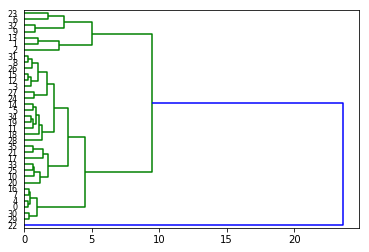

In [24]:
# 유동인구 sum, mean으로 hierarchical clustering
ax = plt.subplot(111)
dendrogram(lmdd, orientation='right')
# ax.set_xlim(xmin=0.03)
# ax.set_xscale('log')
plt.show()

In [172]:
predict = pd.DataFrame(fcluster(lmdd,2,criterion='distance'))

predict.columns=['predict']
rmdd = mdd.reset_index()
kmdd = pd.concat([rmdd,predict],axis=1)
kmdd = kmdd.set_index(kmdd['HDONG_NM'])

In [ ]:
kmdd['predict']

In [154]:
predict = pd.DataFrame(fcluster(lmdd,4,depth = 3,criterion='inconsistent'))

predict.columns=['predict']
rmdd = mdd.reset_index()
kmdd = pd.concat([rmdd,predict],axis=1)
kmdd = kmdd.set_index(kmdd['HDONG_NM'])

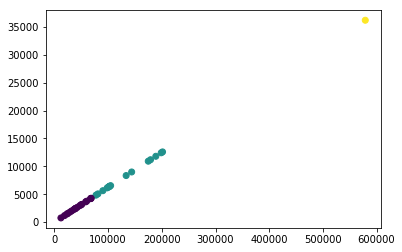

In [174]:
plt.scatter(kmdd['SUM'], kmdd['MEAN'], c = kmdd['predict'])

In [26]:
dic = {}
for i in move.columns[5:]:
    dic[i] = move[i]

In [29]:
del card['pm10'],card['pm10_class'],card['pm25'], card['pm25_class'], card['pm_class']

card.corr()

card.head()

In [29]:
card_ = card.ix[:,:23]

C:\ProgramData\Anaconda3\envs\Review\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [32]:
card_['CSUM'] = card_.ix[:,3:].sum(axis=1)

C:\ProgramData\Anaconda3\envs\Review\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [33]:
card_.head()

,ADMD_NM,date,간식,마실거리,사회활동,식사,임신/육아,취미&여가활동,헬스&뷰티,홈&리빙,...,보건위생,서적문구,숙박,연료판매,요식업소,유통업,음료식품,의료기관,의복,CSUM
0,가회동,2018-04-01,159459.300,313603.290,15945.930,180720.540,759.330,7593.300,68339.700,12908.610,...,592.0,581.0,12504.0,0.0,58298.0,17514.0,2028.0,0.0,9712.0,1404351.400
1,가회동,2018-04-02,188482.330,359431.420,1753.324,217412.176,9643.282,1753.324,75392.932,21916.550,...,1721.0,706.0,3959.0,0.0,70825.0,20274.0,23186.0,2820.0,11415.0,1647532.016
2,가회동,2018-04-03,206237.175,349094.145,7042.245,262575.135,7042.245,5030.175,98591.430,69416.415,...,848.0,1547.0,34988.0,0.0,78220.0,23835.0,3596.0,1636.0,2830.0,1908617.580
3,가회동,2018-04-04,230228.820,343171.260,93394.710,249776.550,3257.955,14117.805,104254.560,46697.355,...,2226.0,1528.0,2220.0,0.0,75845.0,22899.0,4093.0,5704.0,2989.0,1963728.390
4,가회동,2018-04-05,120168.591,242091.468,30700.005,228934.323,11402.859,18420.003,196480.032,28945.719,...,3977.0,7345.0,6585.0,0.0,58737.0,21021.0,4327.0,5353.0,5288.0,1759736.818


In [34]:
fmoves = fmove.sort_values(by=['HDONG_NM','STD_YMD'], axis=0)

In [35]:
fmovet = fmoves.set_index(['HDONG_NM','STD_YMD'])

In [36]:
cardt = card_.set_index(['ADMD_NM','date'])

In [37]:
cards = card_.sort_values(by=['ADMD_NM','date'], axis=0)

In [38]:
fmoves = fmoves.reset_index()
del fmoves['index']

In [321]:
mc = pd.concat([fmoves, cards], axis=1)

In [322]:
del mc['ADMD_NM'], mc['date']

In [323]:
mc.head()

,STD_YMD,HDONG_NM,TMST_05,TMST_06,TMST_07,TMST_08,TMST_09,TMST_10,TMST_11,TMST_12,...,보건위생,서적문구,숙박,연료판매,요식업소,유통업,음료식품,의료기관,의복,CSUM
0,20180401,가회동,143.52,248.11,320.00,640.94,866.80,1092.78,1361.76,1585.97,...,592.0,581.0,12504.0,0.0,58298.0,17514.0,2028.0,0.0,9712.0,702175.700
1,20180402,가회동,402.88,1378.52,4841.15,3285.50,2226.66,1877.89,2057.69,1670.97,...,1721.0,706.0,3959.0,0.0,70825.0,20274.0,23186.0,2820.0,11415.0,823766.008
2,20180403,가회동,383.18,1303.49,4803.54,3512.37,2357.51,2088.04,2513.10,2055.64,...,848.0,1547.0,34988.0,0.0,78220.0,23835.0,3596.0,1636.0,2830.0,954308.790
3,20180404,가회동,341.77,1235.94,4669.63,3474.37,2175.07,1951.45,2200.75,1989.38,...,2226.0,1528.0,2220.0,0.0,75845.0,22899.0,4093.0,5704.0,2989.0,981864.195
4,20180405,가회동,349.81,1253.23,4627.74,3536.24,2349.54,1896.95,2210.27,1868.48,...,3977.0,7345.0,6585.0,0.0,58737.0,21021.0,4327.0,5353.0,5288.0,879868.409


In [324]:
mc_i = mc.set_index(['HDONG_NM','STD_YMD'])

mc_i

scaler=StandardScaler()
scaler.fit(mc_i)
mcs=scaler.transform(mc_i)

In [ ]:
mc_i.corr()

In [98]:
from matplotlib import cm
#%%
color = cm.inferno_r(np.linspace(.4,.8, 30))
# 그래프에서 한글 사용 세팅
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.alpha'] = 0.7
plt.rcParams['lines.antialiased'] = True

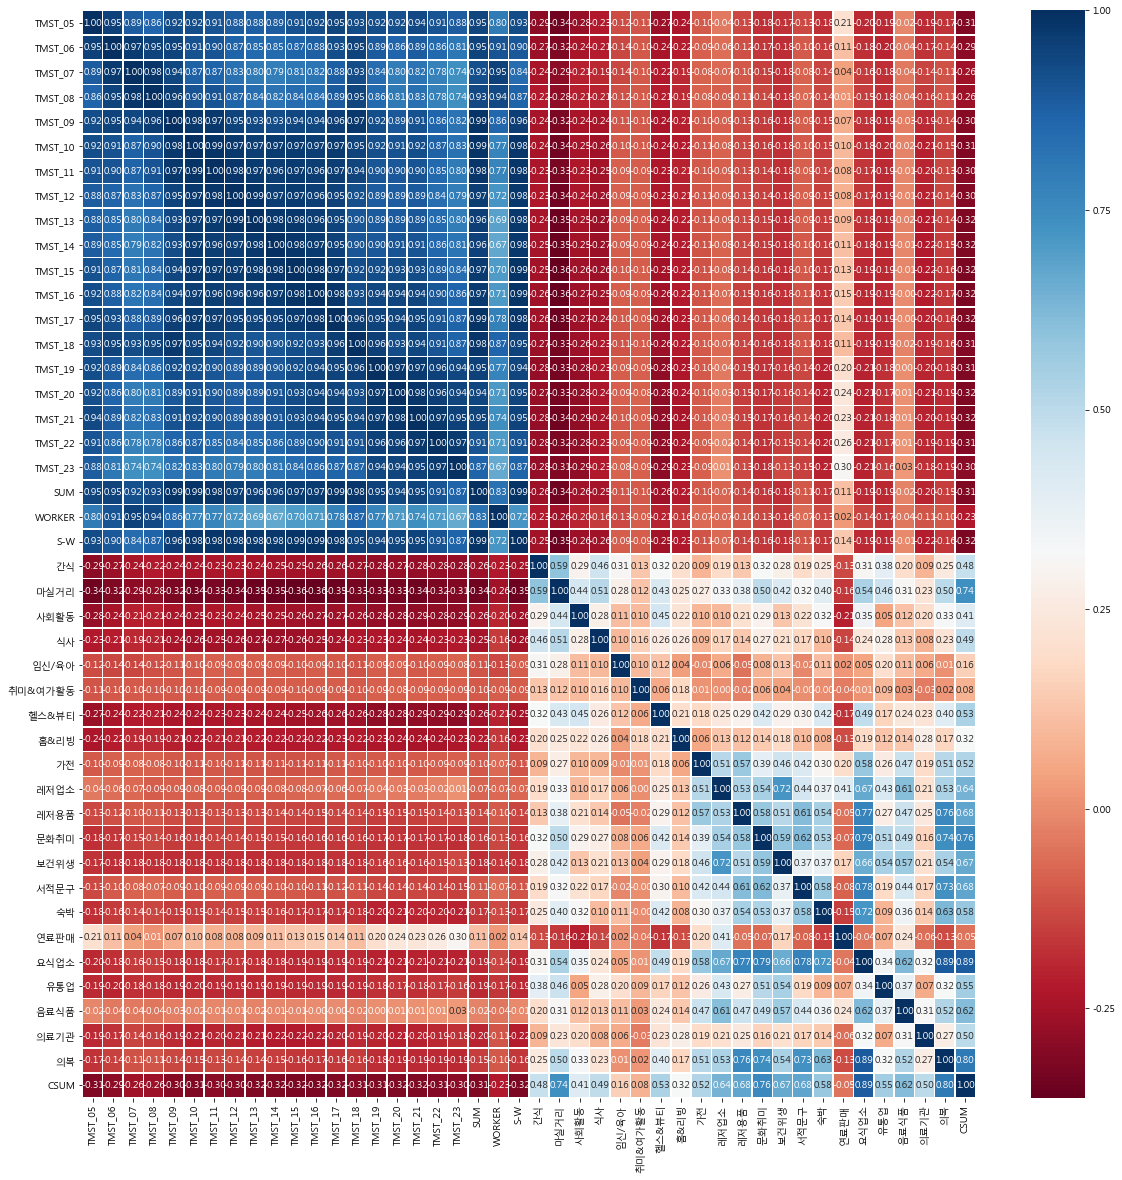

In [331]:
#시간대별 유동인구와 카테고리별 카드소비 상관관계
import matplotlib.pyplot as plt 
import seaborn as sns    
%matplotlib inline  
plt.figure(figsize=(20,20))
sns.heatmap(data = mc_i.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='RdBu')

real = pd.read_pickle('C:/Users/SunA/Desktop/2019BigCon/최종/real_move.pickle')

real.head()

In [67]:
fmover = fmovet.reset_index()

In [101]:
movecorr = fmovet['SUM'].unstack(0).corr()

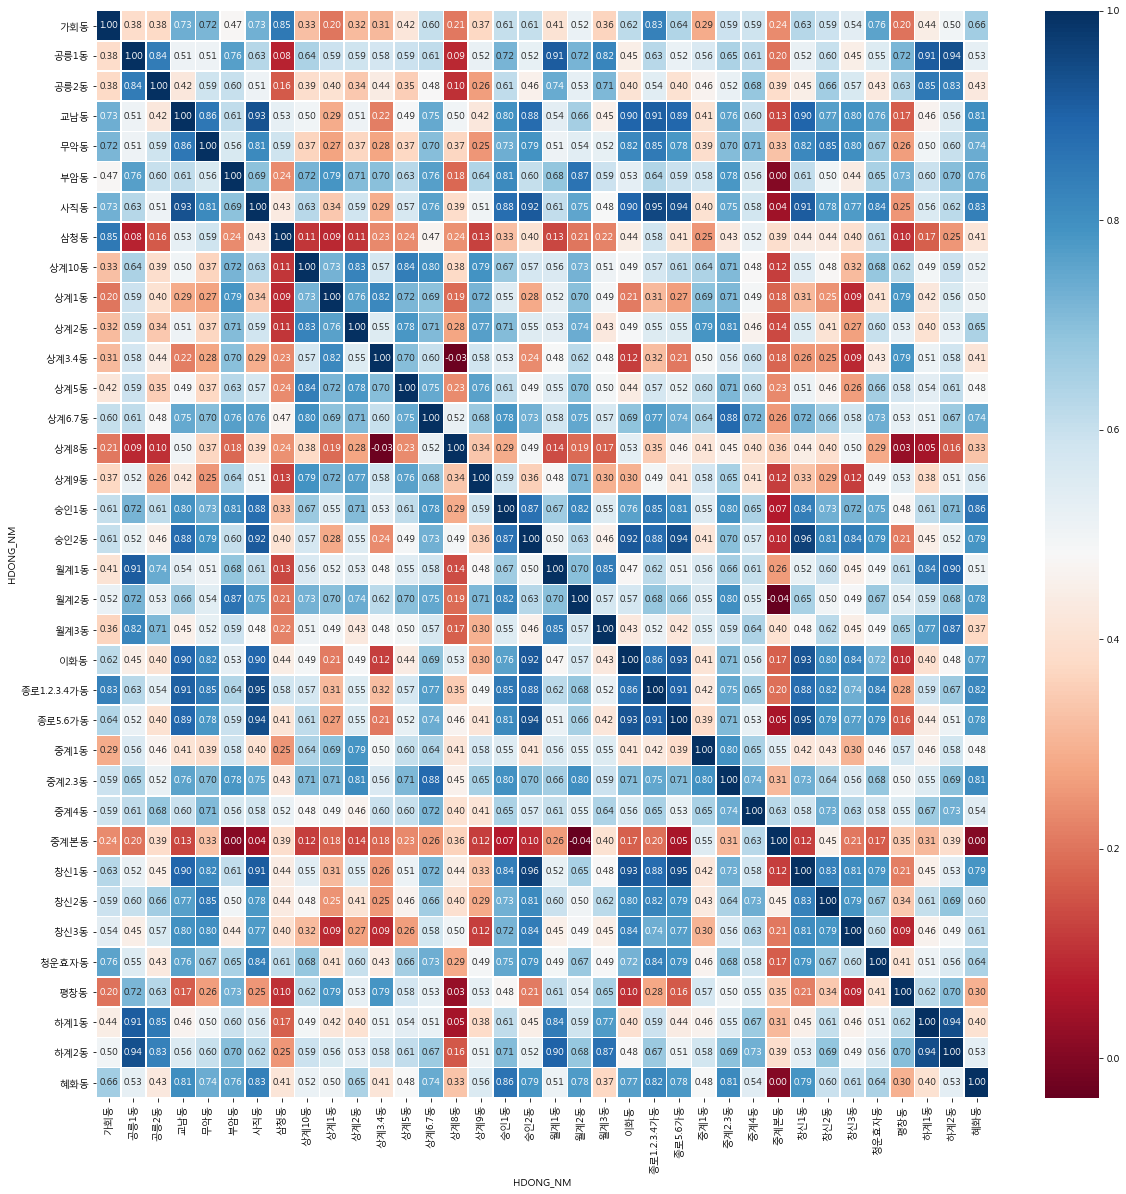

In [99]:
# 동별 유동인구 총합 상관관계
import matplotlib.pyplot as plt 
import seaborn as sns    
%matplotlib inline  
plt.figure(figsize=(20,20))
sns.heatmap(data = movecorr, annot=True, 
fmt = '.2f', linewidths=.5, cmap='RdBu')

시간별 유동인구 상관관계보니 0.7 이상으로 높은 상관관계보임  
그럼 그냥 유동인구 SUM을 대표값으로 써도 될듯  
그럼 SUM을 대표값으로 각 동의 유동인구 상관관계를 뽑아봄  
이를 이용해서 상관관계가 높은 애들끼리 클러스터링 해보자  

dong = {}
for d in movecorr.index:
    dong[d] = [movecorr.index[i] for i,j in enumerate(movecorr.loc[d]) if j>0.7]
    dong[d].remove(d)

for i in dong.keys():
    print(i,dong[i])

md.head()

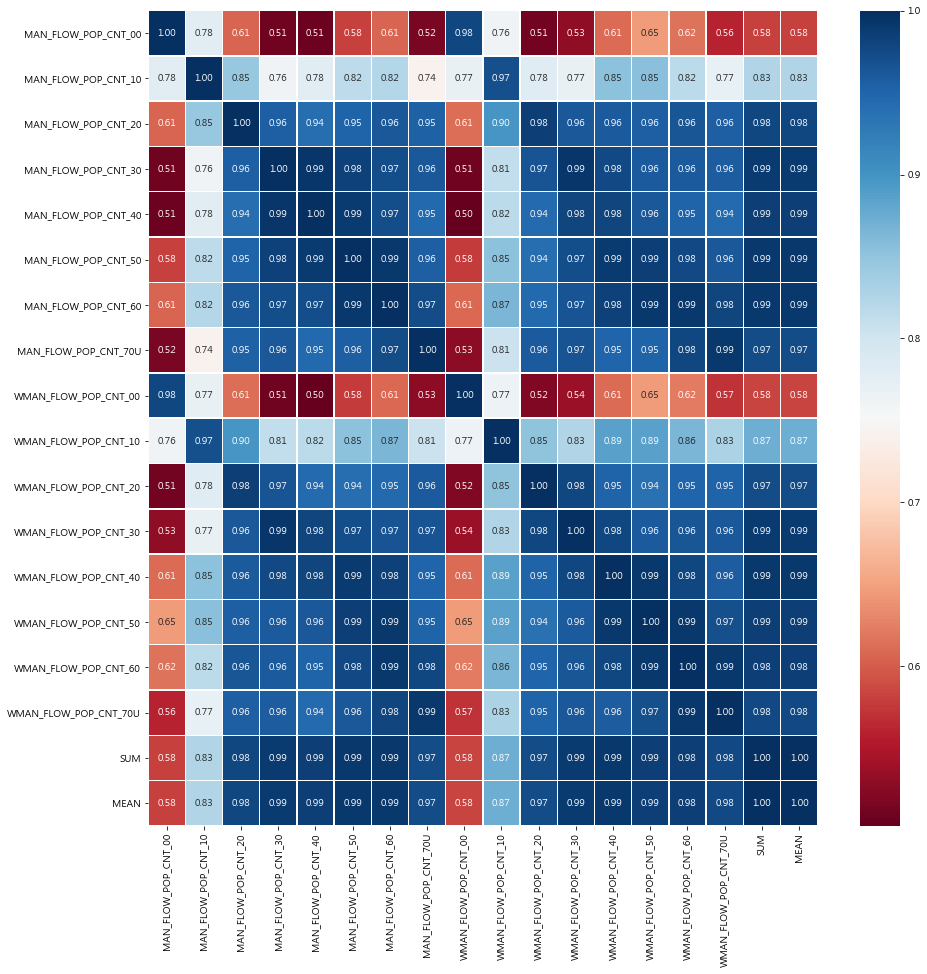

In [127]:
# 나이대별 유동인구 상관관계
import matplotlib.pyplot as plt 
import seaborn as sns    
%matplotlib inline  
plt.figure(figsize=(15,15))
sns.heatmap(data = md.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='RdBu')

In [136]:
cardss = cards.reset_index()
mdc = pd.concat([md.reset_index(), cardss], axis=1)

mdc.set_index(['HDONG_NM','STD_YMD']).corr().loc['요식업소']

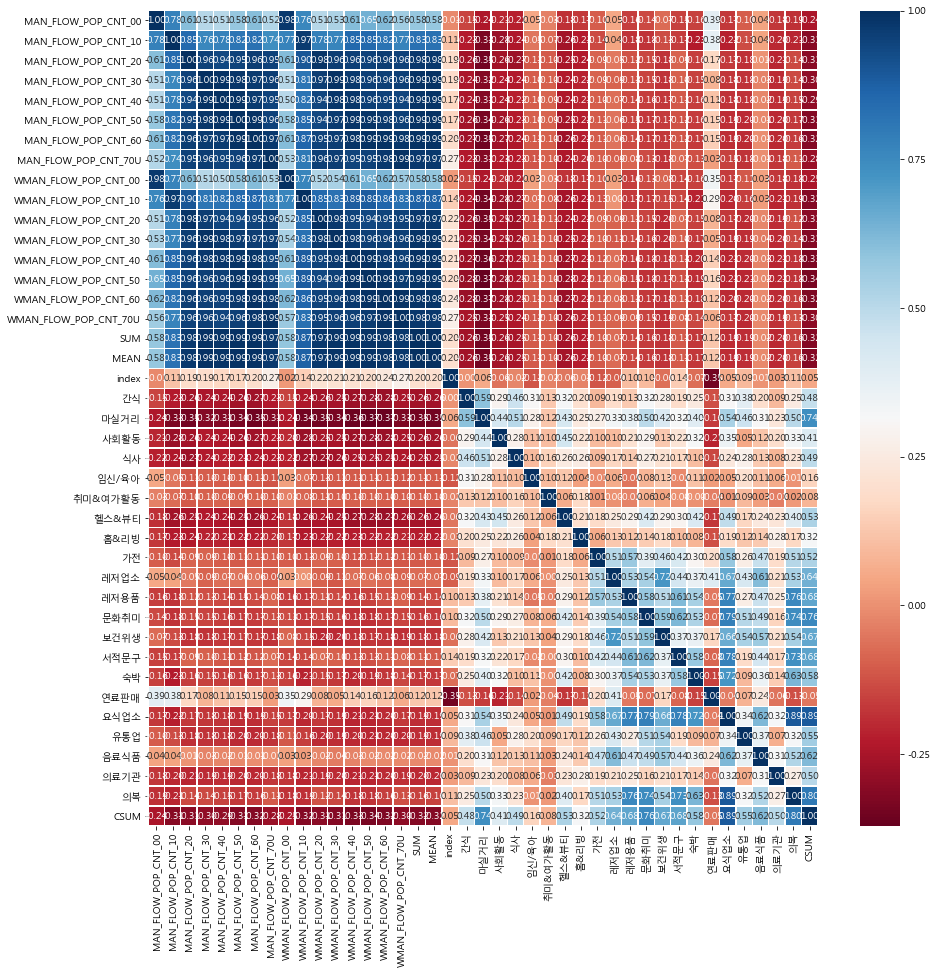

In [142]:
# 나이대별 유동인구와 카드 소비 상관관계
import matplotlib.pyplot as plt 
import seaborn as sns    
%matplotlib inline  
plt.figure(figsize=(15,15))
sns.heatmap(data = mdc.set_index(['HDONG_NM','STD_YMD']).corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='RdBu')

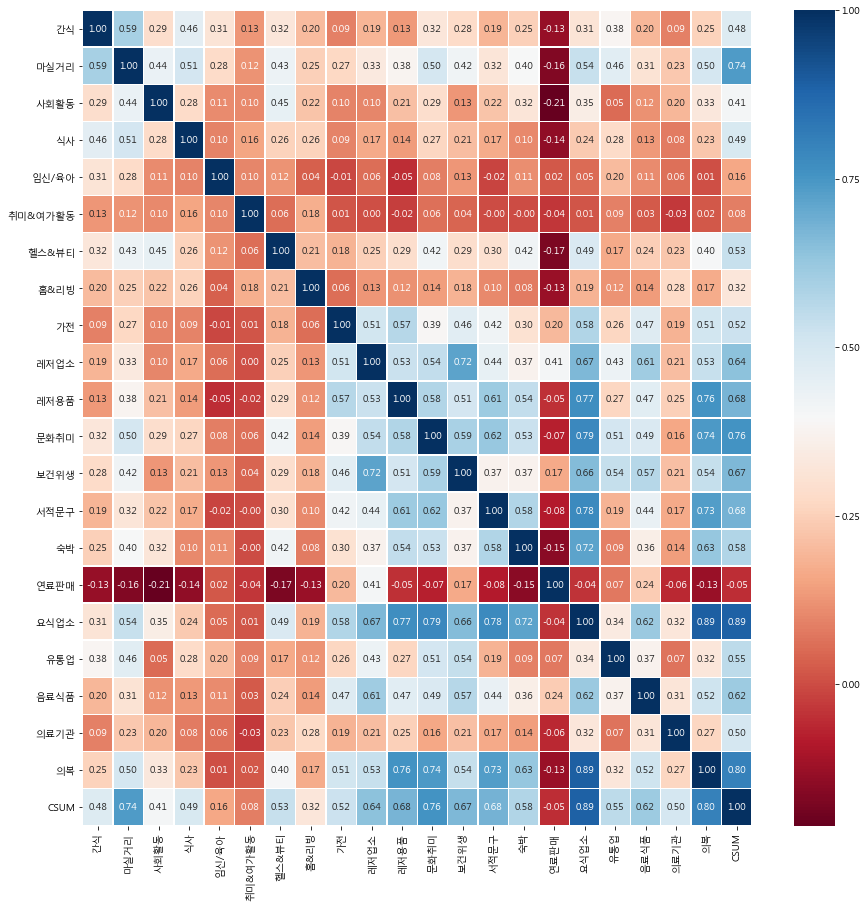

In [143]:
# 카테고리별 카드소비 상관관계
import matplotlib.pyplot as plt 
import seaborn as sns    
%matplotlib inline  
plt.figure(figsize=(15,15))
sns.heatmap(data = cards.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='RdBu')

In [145]:
rufine = pd.read_pickle('C:/Users/SunA/Desktop/2019BigCon/최종/gutotal_365.pickle')

In [149]:
rufine = rufine.sort_values(by=['행정동','date'], axis=0)

In [151]:
del rufine['pm_class_info']

In [153]:
rufine = rufine.fillna(0)

In [156]:
rufine.head()

,행정동,date,pm10,pm25,msg,pm10_class,pm25_class,pm_class,msg_yes
0,가회동,2018-04-01,98.3,56.5,0,2,2,2,0
1,가회동,2018-04-02,87.8,36.1,0,2,2,2,0
2,가회동,2018-04-03,93.4,36.1,0,2,2,2,0
3,가회동,2018-04-04,19.4,10.3,0,0,0,0,0
4,가회동,2018-04-05,17.1,11.6,0,0,0,0,0


In [177]:
del cardss['index']

In [181]:
fc = pd.concat([cardss.set_index(['ADMD_NM','date']),rufine.set_index(['행정동','date'])], axis=1)

In [187]:
rfc = fc.reset_index()

In [230]:
spring=pd.DataFrame()

In [235]:
# spring = rfc[61:153]
for i in range(27):
    summer = pd.concat([spring,rfc[61+365*i:153+365*i]],axis=0)

In [ ]:
summer.set_index(['level_0','level_1']).corr()

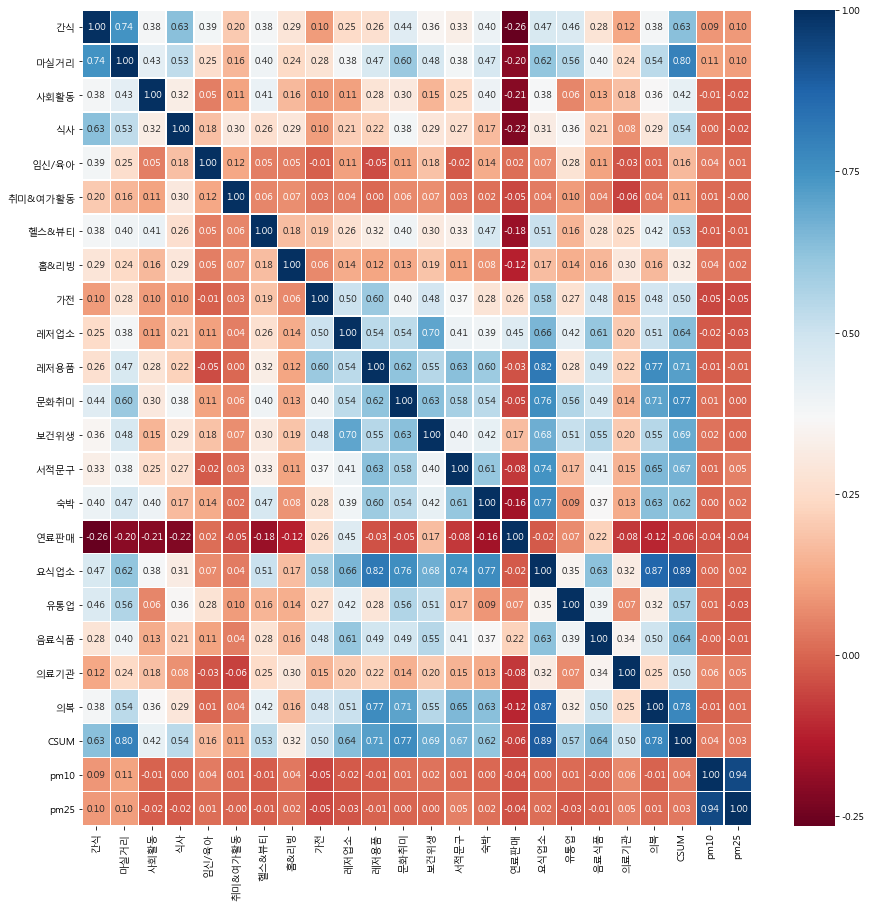

In [237]:
import matplotlib.pyplot as plt 
import seaborn as sns    
%matplotlib inline  
plt.figure(figsize=(15,15))
sns.heatmap(data = summer.set_index(['level_0','level_1']).corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='RdBu')